In [1]:
import numpy as np
import pandas as pd
import pingouin as pg
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols

c:\Users\Usuario\anaconda3_semestre2_2022\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
c:\Users\Usuario\anaconda3_semestre2_2022\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:
dados = pd.read_excel('anova.xlsx')
dados = pd.read_excel('Base de Dados_Glauco_JP-organizados.xlsx','sequencial')
dados = dados.dropna()
dados.head(3)

,Distance,Station,Period,River type,Sector,Week,Month/Year,year,Al(dis),Al(tot),...,P(sed),Mn(sed),Clay,Silt,sandVF,sandF,sandM,sandC,sandVC,Q
0,-19.2,PT-52,Dry Period,Principal,PT-52,14,2019-04-03,2019,0.041871,1.069429,...,198.0,395.0,0.0,93.0,97.0,237.0,362.0,199.0,12.0,32.360
1,-19.2,PT-52,Dry Period,Principal,PT-52,15,2019-04-10,2019,0.123471,1.408143,...,99.4,436.0,0.0,101.0,81.0,242.0,353.0,206.0,17.0,37.270
2,-19.2,PT-52,Dry Period,Principal,PT-52,16,2019-04-17,2019,0.079400,2.120429,...,666.0,2290.0,40.0,766.0,122.0,63.0,9.0,0.0,0.0,46.154


In [3]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 620 entries, 0 to 619
Data columns (total 36 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Distance    620 non-null    float64       
 1   Station     620 non-null    object        
 2   Period      620 non-null    object        
 3   River type  620 non-null    object        
 4   Sector      620 non-null    object        
 5   Week        620 non-null    int64         
 6   Month/Year  620 non-null    datetime64[ns]
 7   year        620 non-null    int64         
 8   Al(dis)     620 non-null    float64       
 9   Al(tot)     620 non-null    float64       
 10  As(tot)     620 non-null    float64       
 11  Pb(dis)     620 non-null    float64       
 12  Pd(tot)     620 non-null    float64       
 13  Fe(dis)     620 non-null    float64       
 14  Fe(tot)     620 non-null    float64       
 15  P(dis)      620 non-null    float64       
 16  P(tot)      620 non-null  

In [4]:
#pd.set_option('display.max_rows',None)
dados.groupby(['Station','Period']).describe().T

Station                PT-13                       PT-14                \
Period            Dry Period  Rainy Period    Dry Period  Rainy Period   
Distance count  7.900000e+01  7.600000e+01  7.900000e+01  7.800000e+01   
         mean   8.800000e+00  8.800000e+00  5.390000e+01  5.390000e+01   
         std    7.150830e-15  5.364480e-15  4.290498e-14  4.290851e-14   
         min    8.800000e+00  8.800000e+00  5.390000e+01  5.390000e+01   
         25%    8.800000e+00  8.800000e+00  5.390000e+01  5.390000e+01   
...                      ...           ...           ...           ...   
Q        min    1.061563e+01  1.402330e+01  1.061563e+01  1.402330e+01   
         25%    1.624047e+01  4.304747e+01  1.624047e+01  4.363739e+01   
         50%    2.218991e+01  6.684765e+01  2.218991e+01  6.873784e+01   
         75%    3.050043e+01  1.061795e+02  3.050043e+01  1.089183e+02   
         max    9.040060e+01  2.863792e+02  9.040060e+01  7.149812e+02   

Station                PT-19                       PT-52                
Period            Dry Period  Rainy Period    Dry Period  Rainy Period  
Distance count  7.900000e+01  7.500000e+01  7.600000e+01  7.800000e+01  
         mean   2.498000e+02  2.498000e+02 -1.920000e+01 -1.920000e+01  
         std    3.718432e-13  3.433572e-13  2.861056e-14  2.860567e-14  
         min    2.498000e+02  2.498000e+02 -1.920000e+01 -1.920000e+01  
         25%    2.498000e+02  2.498000e+02 -1.920000e+01 -1.920000e+01  
...                      ...           ...           ...           ...  
Q        min    1.061563e+01  1.402330e+01  1.061563e+01  1.402330e+01  
         25%    1.624047e+01  4.371112e+01  1.640318e+01  4.760487e+01  
         50%    2.218991e+01  6.881409e+01  2.230542e+01  7.566505e+01  
         75%    3.050043e+01  1.122809e+02  3.023422e+01  1.139502e+02  
         max    9.040060e+01  5.748590e+02  9.040060e+01  7.149812e+02  

[248 rows x 8 columns]

# Dissolvidos

(0.0, 1.5)

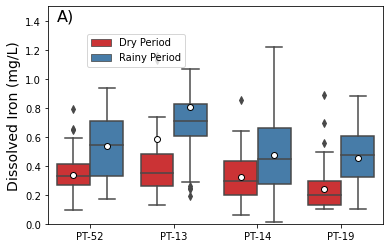

In [5]:
sns.boxplot(y='Fe(dis)',
            x='Sector',
            data=dados,
            hue='Period',
            showmeans=True,
            palette="Set1",
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"6"})

plt.xlabel('')
plt.ylabel('Dissolved Iron (mg/L)', fontsize=14)
plt.text(-0.4,1.4,"A)",
         horizontalalignment='left',
         size=16,
         color='black',
         weight='normal')
plt.legend(loc='lower left',
           ncol=1,
           bbox_to_anchor=(0.1,0.7),
           frameon=True)
plt.ylim([0,1.5])

(0.0, 1.5)

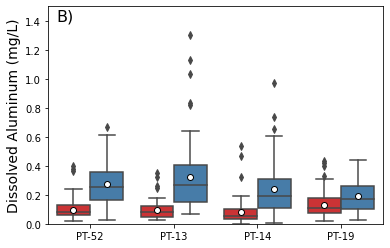

In [6]:
sns.boxplot(y='Al(dis)',
            x='Sector',
            data=dados,
            hue='Period',
            showmeans=True,
            palette="Set1",
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"6"})

plt.xlabel('')
plt.ylabel('Dissolved Aluminum (mg/L)', fontsize=14)
plt.text(-0.4,1.4,"B)",
         horizontalalignment='left',
         size=16,
         color='black',
         weight='normal')
#plt.legend(loc='lower left',
#           ncol=1,
#           bbox_to_anchor=(0.1,0.7),
#           frameon=True)
plt.legend('',frameon=False)
plt.ylim([0,1.5])

(0.0, 0.35)

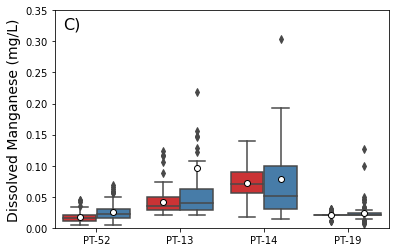

In [36]:
sns.boxplot(y='Mn(dis)',
            x='Sector',
            data=dados,
            hue='Period',
            showmeans=True,
            palette="Set1",
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"6"})

plt.xlabel('')
plt.ylabel('Dissolved Manganese (mg/L)', fontsize=14)
plt.text(-0.4,0.32,"C)",
         horizontalalignment='left',
         size=16,
         color='black',
         weight='normal')
#plt.legend(loc='lower left',
#           ncol=1,
#           bbox_to_anchor=(0.1,0.7),
#           frameon=True)
plt.legend('',frameon=False)
plt.ylim([0,0.35])

In [8]:
dados.groupby('Period').describe()#.T.to_excel('outputmediasdissolvido.xlsx')

Distance                                                         \
                count       mean         std   min   25%   50%    75%    max   
Period                                                                         
Dry Period      313.0  74.211821  105.451330 -19.2   8.8  53.9  249.8  249.8   
Rainy Period    307.0  72.020847  104.613184 -19.2 -19.2   8.8   53.9  249.8   

               Week             ... sandVC             Q             \
              count       mean  ...    75%    max  count       mean   
Period                          ...                                   
Dry Period    313.0  79.376997  ...   21.0  859.0  313.0  25.855933   
Rainy Period  307.0  86.374593  ...    1.0  708.0  307.0  89.438683   

                                                                      \
                    std        min        25%        50%         75%   
Period                                                                 
Dry Period    13.991353  10.615627  16.245536  22.189911   31.032857   
Rainy Period  82.001828  14.023304  43.858571  68.814092  112.020982   

                          
                     max  
Period                    
Dry Period     90.400595  
Rainy Period  714.981235  

[2 rows x 248 columns]

# Totais

(0.0, 25.0)

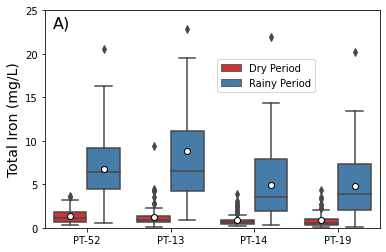

In [9]:
sns.boxplot(y='Fe(tot)',
            x='Sector',
            data=dados,
            hue='Period',
            showmeans=True,
            palette="Set1",
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"6"})

plt.xlabel('')
plt.ylabel('Total Iron (mg/L)', fontsize=14)
plt.text(-0.4,23,"A)",
         horizontalalignment='left',
         size=16,
         color='black',
         weight='normal')
plt.legend(loc='lower left',
           ncol=1,
           bbox_to_anchor=(0.5,0.6),
           frameon=True)
#plt.legend('',frameon=False)
plt.ylim([0,25])

(0.0, 25.0)

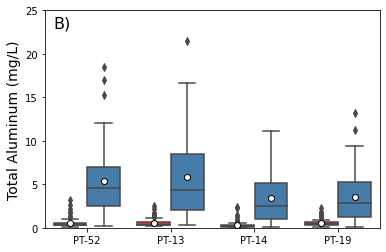

In [10]:
sns.boxplot(y='Al(tot)',
            x='Sector',
            data=dados,
            hue='Period',
            showmeans=True,
            palette="Set1",
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"6"})

plt.xlabel('')
plt.ylabel('Total Aluminum (mg/L)', fontsize=14)
plt.text(-0.4,23,"B)",
         horizontalalignment='left',
         size=16,
         color='black',
         weight='normal')
#plt.legend(loc='lower left',
#           ncol=1,
#           bbox_to_anchor=(0.1,0.5),
#           frameon=True)
plt.legend('',frameon=False)
plt.ylim([0,25])

(0.0, 5.0)

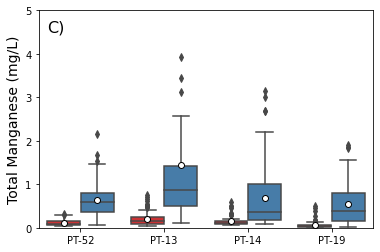

In [11]:
sns.boxplot(y='Mn(tot)',
            x='Sector',
            data=dados,
            hue='Period',
            showmeans=True,
            palette="Set1",
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"6"})

plt.xlabel('')
plt.ylabel('Total Manganese (mg/L)', fontsize=14)
plt.text(-0.4,4.5,"C)",
         horizontalalignment='left',
         size=16,
         color='black',
         weight='normal')
#plt.legend(loc='lower left',
#           ncol=1,
#           bbox_to_anchor=(0.1,0.5),
#           frameon=True)
plt.legend('',frameon=False)
plt.ylim([0,5])

In [12]:
dados.columns

Index(['Distance', 'Station', 'Period', 'River type', 'Sector', 'Week',
       'Month/Year', 'year', 'Al(dis)', 'Al(tot)', 'As(tot)', 'Pb(dis)',
       'Pd(tot)', 'Fe(dis)', 'Fe(tot)', 'P(dis)', 'P(tot)', 'Mn(dis)',
       'Mn(tot)', 'pH', 'T', 'Turb', 'Al(sed)', 'As(sed)', 'Pb(sed)',
       'Fe(sed)', 'P(sed)', 'Mn(sed)', 'Clay', 'Silt', 'sandVF', 'sandF',
       'sandM', 'sandC', 'sandVC', 'Q'],
      dtype='object')

<AxesSubplot:title={'center':'Q-Q Plot'}, xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

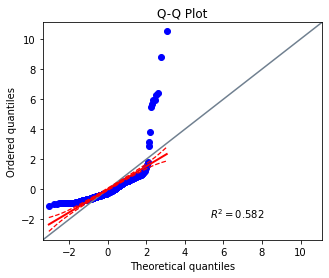

In [13]:
pg.qqplot(dados['Fe(dis)'])

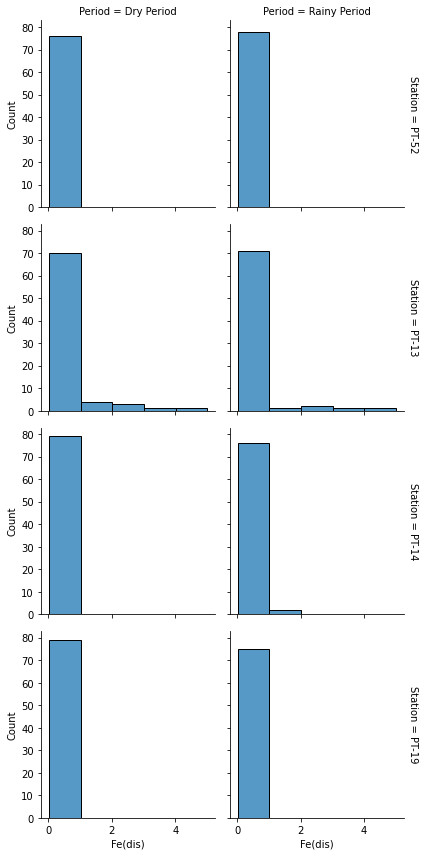

In [14]:
sns.displot(dados,
            x="Fe(dis)", col="Period", row="Station", bins=20,kde=False,
    binwidth=1, height=3, facet_kws=dict(margin_titles=True))

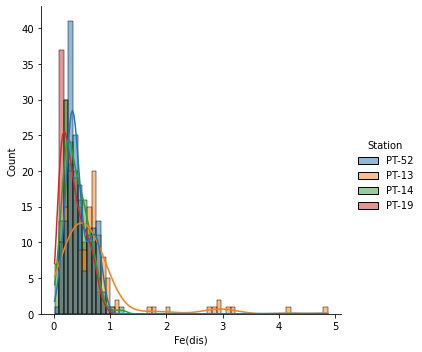

In [15]:
sns.displot(x='Fe(dis)', hue='Station', kde=True, data=dados)

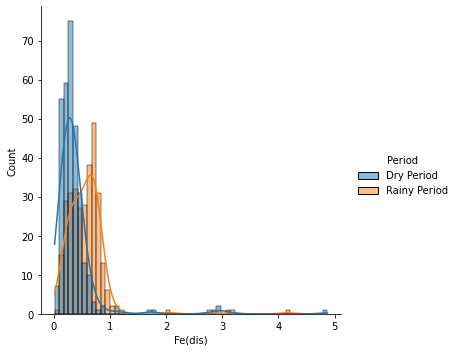

In [16]:
sns.displot(x='Fe(dis)', hue='Period', kde=True, data=dados)

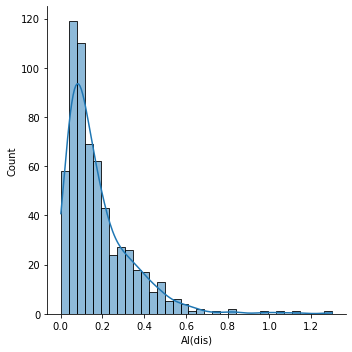

In [17]:
sns.displot(dados['Al(dis)'], kde=True)

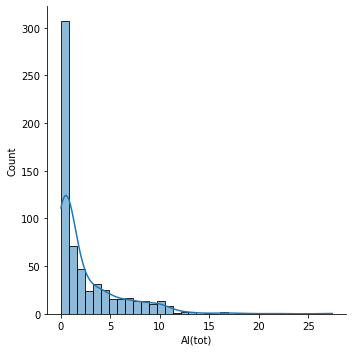

In [18]:
sns.displot(dados['Al(tot)'], kde=True)

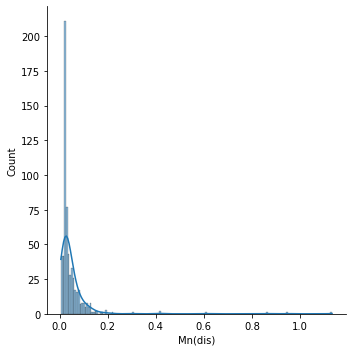

In [19]:
sns.displot(dados['Mn(dis)'], kde=True)

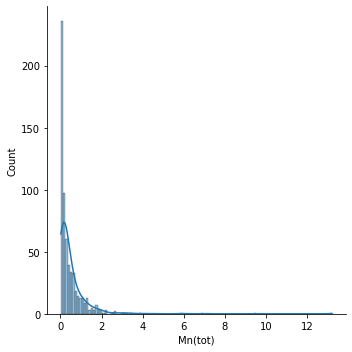

In [20]:
sns.displot(dados['Mn(tot)'], kde=True)

<AxesSubplot:title={'center':'Q-Q Plot'}, xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

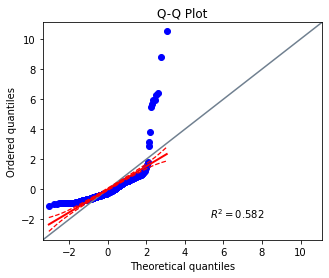

In [21]:
pg.qqplot(dados['Fe(dis)'])

In [22]:
#sns.displot(x='Fedis', hue='estacao', kde=True, data=dados)

In [23]:
# teste de normalidade
dado_norm = dados['Fe(dis)']
stats.shapiro(dado_norm).pvalue
# se pvalue >0.05 os valores tem distribuição normal

7.520926072508603e-36

In [24]:
pg.normality(dados.loc[:,'Fe(dis)':]) # se os dados forem normais ... TRUE

,W,pval,normal
Fe(dis),0.587256,7.520926e-36,False
Fe(tot),0.675342,9.368871e-33,False
P(dis),0.906076,4.315269e-19,False
P(tot),0.753824,2.281958e-29,False
Mn(dis),0.333019,1.772643e-42,False
Mn(tot),0.435860,4.242235e-40,False
pH,0.977359,3.356191e-08,False
T,0.968816,3.293306e-10,False
Turb,0.769383,1.345734e-28,False
Al(sed),0.913775,2.713972e-18,False


In [25]:
pg.multivariate_normality(dados.loc[:,'Fe(dis)':]) # se os dados forem normais ... TRUE

HZResults(hz=1.631127405014568, pval=0.0, normal=False)

In [26]:
dados.columns

Index(['Distance', 'Station', 'Period', 'River type', 'Sector', 'Week',
       'Month/Year', 'year', 'Al(dis)', 'Al(tot)', 'As(tot)', 'Pb(dis)',
       'Pd(tot)', 'Fe(dis)', 'Fe(tot)', 'P(dis)', 'P(tot)', 'Mn(dis)',
       'Mn(tot)', 'pH', 'T', 'Turb', 'Al(sed)', 'As(sed)', 'Pb(sed)',
       'Fe(sed)', 'P(sed)', 'Mn(sed)', 'Clay', 'Silt', 'sandVF', 'sandF',
       'sandM', 'sandC', 'sandVC', 'Q'],
      dtype='object')

modelo=ols("'Fe(dis)' ~ Station + Period +(Station*Period)", data=dados, missing='drop').fit()
tabela=sm.stats.anova_lm(modelo, typ=1)
tabela

In [27]:
dados.groupby(['Station','Period']).describe()

Distance                                            \
                        count   mean           std    min    25%    50%   
Station Period                                                            
PT-13   Dry Period       79.0    8.8  7.150830e-15    8.8    8.8    8.8   
        Rainy Period     76.0    8.8  5.364480e-15    8.8    8.8    8.8   
PT-14   Dry Period       79.0   53.9  4.290498e-14   53.9   53.9   53.9   
        Rainy Period     78.0   53.9  4.290851e-14   53.9   53.9   53.9   
PT-19   Dry Period       79.0  249.8  3.718432e-13  249.8  249.8  249.8   
        Rainy Period     75.0  249.8  3.433572e-13  249.8  249.8  249.8   
PT-52   Dry Period       76.0  -19.2  2.861056e-14  -19.2  -19.2  -19.2   
        Rainy Period     78.0  -19.2  2.860567e-14  -19.2  -19.2  -19.2   

                                    Week             ...      sandVC         \
                        75%    max count       mean  ...         75%    max   
Station Period                                       ...                      
PT-13   Dry Period      8.8    8.8  79.0  80.000000  ...   36.000000  859.0   
        Rainy Period    8.8    8.8  76.0  84.078947  ...   10.189375  708.0   
PT-14   Dry Period     53.9   53.9  79.0  80.000000  ...    0.000000  718.0   
        Rainy Period   53.9   53.9  78.0  86.038462  ...    0.000000  251.0   
PT-19   Dry Period    249.8  249.8  79.0  80.000000  ...  187.125000  508.0   
        Rainy Period  249.8  249.8  75.0  81.026667  ...    8.750000  364.0   
PT-52   Dry Period    -19.2  -19.2  76.0  77.434211  ...    6.000000  376.0   
        Rainy Period  -19.2  -19.2  78.0  94.089744  ...    0.916667  538.0   

                         Q                                              \
                     count       mean        std        min        25%   
Station Period                                                           
PT-13   Dry Period    79.0  25.836529  14.087079  10.615627  16.240473   
        Rainy Period  76.0  79.124885  51.643177  14.023304  43.047468   
PT-14   Dry Period    79.0  25.836529  14.087079  10.615627  16.240473   
        Rainy Period  78.0  89.557674  89.872587  14.023304  43.637388   
PT-19   Dry Period    79.0  25.836529  14.087079  10.615627  16.240473   
        Rainy Period  75.0  94.661413  90.243268  14.023304  43.711116   
PT-52   Dry Period    76.0  25.916442  13.971301  10.615627  16.403181   
        Rainy Period  78.0  94.347179  89.806343  14.023304  47.604873   

                                                         
                            50%         75%         max  
Station Period                                           
PT-13   Dry Period    22.189911   30.500432   90.400595  
        Rainy Period  66.847652  106.179531  286.379196  
PT-14   Dry Period    22.189911   30.500432   90.400595  
        Rainy Period  68.737842  108.918337  714.981235  
PT-19   Dry Period    22.189911   30.500432   90.400595  
        Rainy Period  68.814092  112.280923  574.858988  
PT-52   Dry Period    22.305424   30.234219   90.400595  
        Rainy Period  75.665051  113.950238  714.981235  

[8 rows x 248 columns]

In [28]:
dados.query('Station == "PT-52"')

,Distance,Station,Period,River type,Sector,Week,Month/Year,year,Al(dis),Al(tot),...,P(sed),Mn(sed),Clay,Silt,sandVF,sandF,sandM,sandC,sandVC,Q
0,-19.2,PT-52,Dry Period,Principal,PT-52,14,2019-04-03 00:00:00,2019,0.041871,1.069429,...,198.000000,395.000000,0.000000,93.000000,97.000000,237.000000,362.0,199.0,12.0,32.360000
1,-19.2,PT-52,Dry Period,Principal,PT-52,15,2019-04-10 00:00:00,2019,0.123471,1.408143,...,99.400000,436.000000,0.000000,101.000000,81.000000,242.000000,353.0,206.0,17.0,37.270000
2,-19.2,PT-52,Dry Period,Principal,PT-52,16,2019-04-17 00:00:00,2019,0.079400,2.120429,...,666.000000,2290.000000,40.000000,766.000000,122.000000,63.000000,9.0,0.0,0.0,46.154000
3,-19.2,PT-52,Dry Period,Principal,PT-52,17,2019-04-24 00:00:00,2019,0.057929,0.914714,...,398.000000,1240.000000,32.000000,638.000000,188.000000,124.000000,18.0,0.0,0.0,31.032857
4,-19.2,PT-52,Dry Period,Principal,PT-52,18,2019-05-01 00:00:00,2019,0.053586,0.519857,...,241.000000,824.000000,21.000000,416.000000,179.000000,156.000000,62.0,65.0,101.0,27.748571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,-19.2,PT-52,Rainy Period,Principal,PT-52,161,2022-01-05 00:00:00,2022,0.478571,5.325714,...,323.666667,1740.333333,84.666667,696.333333,202.333333,16.666667,0.0,0.0,0.0,714.981235
387,-19.2,PT-52,Rainy Period,Principal,PT-52,162,2022-01-01 00:00:00,2022,0.666000,10.084000,...,310.000000,1696.500000,81.500000,698.000000,205.000000,15.500000,0.0,0.0,0.0,192.690104
388,-19.2,PT-52,Rainy Period,Principal,PT-52,163,2022-01-05 00:00:00,2022,0.415714,5.260000,...,296.333333,1652.666667,78.333333,699.666667,207.666667,14.333333,0.0,0.0,0.0,115.030521
389,-19.2,PT-52,Rainy Period,Principal,PT-52,164,2022-01-29 00:00:00,2022,0.152857,2.181429,...,282.666667,1608.833333,75.166667,701.333333,210.333333,13.166667,0.0,0.0,0.0,130.308494


In [29]:
#dados.query(('Station == "PT-52"') and ('epoca == "Rainy Season"')).pairwise_tukey(dv='Fedis', between='epoca').round(3)

In [30]:
dados.query('Station == "PT-52"').pairwise_tukey(dv='Fe(tot)', between='Period').round(3)

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,Dry Period,Rainy Period,1.315,6.772,-5.457,0.44,-12.405,0.0,-1.989


In [31]:
dados.query('Station == "PT-52"').pairwise_tukey(dv='Mn(dis)', between='Period').round(3)

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,Dry Period,Rainy Period,0.017,0.026,-0.008,0.002,-4.356,0.0,-0.699


In [32]:
# tudo diferente ...

In [33]:
#from ipynb.fs.full.gasph_letras import letras

In [34]:
teste=dados.query('Station == "PT-52"')
modelo = ols('Al(dis) ~ Period', data=teste).fit()
resultado = sm.stats.anova_lm(modelo)
resultado

PatsyError: Error evaluating factor: NameError: name 'Al' is not defined
    Al(dis) ~ Period
    ^^^^^^^

In [37]:
dados.columns

Index(['Distance', 'Station', 'Period', 'River type', 'Sector', 'Week',
       'Month/Year', 'year', 'Al(dis)', 'Al(tot)', 'As(tot)', 'Pb(dis)',
       'Pd(tot)', 'Fe(dis)', 'Fe(tot)', 'P(dis)', 'P(tot)', 'Mn(dis)',
       'Mn(tot)', 'pH', 'T', 'Turb', 'Al(sed)', 'As(sed)', 'Pb(sed)',
       'Fe(sed)', 'P(sed)', 'Mn(sed)', 'Clay', 'Silt', 'sandVF', 'sandF',
       'sandM', 'sandC', 'sandVC', 'Q'],
      dtype='object')

(5.0, 9.0)

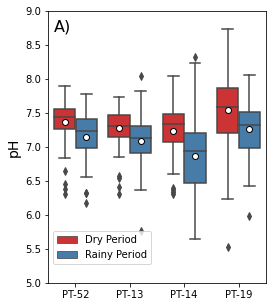

In [41]:
# nova tentativa
plt.figure(figsize=(3.9,5))
sns.boxplot(y='pH',
            x='Sector',
            data=dados,
            hue='Period',
            showmeans=True,
            palette="Set1",
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"6"})

plt.xlabel('')
plt.ylabel('pH', fontsize=14)
plt.text(-0.4,8.7,"A)",
         horizontalalignment='left',
         size=16,
         color='black',
         weight='normal')
plt.legend(loc='lower left',
           ncol=1,
           bbox_to_anchor=(0,0.05),
           frameon=True)
#plt.legend('',frameon=False)
plt.ylim([5,9])

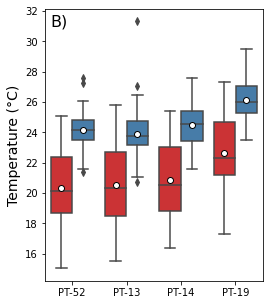

In [42]:
plt.figure(figsize=(3.9,5))
sns.boxplot(y='T',
            x='Sector',
            data=dados,
            hue='Period',
            showmeans=True,
            palette="Set1",
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"6"})

plt.xlabel('')
plt.ylabel('Temperature (°C)', fontsize=14)
plt.text(-0.4,31,"B)",
         horizontalalignment='left',
         size=16,
         color='black',
         weight='normal')
#plt.legend(loc='lower left',
#           ncol=1,
#           bbox_to_anchor=(0,0.05),
#           frameon=True)
plt.legend('',frameon=False)
#plt.ylim([0,5])

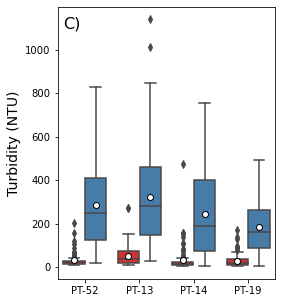

In [43]:
plt.figure(figsize=(3.9,5))
sns.boxplot(y='Turb',
            x='Sector',
            data=dados,
            hue='Period',
            showmeans=True,
            palette="Set1",
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"6"})

plt.xlabel('')
plt.ylabel('Turbidity (NTU)', fontsize=14)
plt.text(-0.4,1100,"C)",
         horizontalalignment='left',
         size=16,
         color='black',
         weight='normal')
#plt.legend(loc='lower left',
#           ncol=1,
#           bbox_to_anchor=(0,0.05),
#           frameon=True)
plt.legend('',frameon=False)
#plt.ylim([0,5])

(0.0, 0.0045)

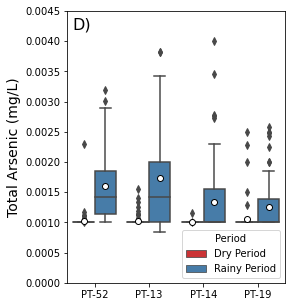

In [44]:
'''
'Artot', 'Pbdis', 'Pdtot',
       'Fedis', 'Fetot', 'Pdis', 'Ptot', 'Mndis', 'Mntot', 'pH', 'T', 'Turb',
       's_Al', 's_Ar', 's_Pb', 's_Fe', 's_P', 's_Mn', 's_arg', 's_sil',
       's_amf', 's_af', 's_am', 's_ag', 's_amg', 'Qmed'],
'''

#plt.figure(figsize=(3.9,5))
plt.figure(figsize=(3.9,5))
sns.boxplot(y='As(tot)',
            x='Sector',
            data=dados,
            hue='Period',
            showmeans=True,
            palette="Set1",
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"6"})

plt.xlabel('')
plt.ylabel('Total Arsenic (mg/L)', fontsize=14)
plt.text(-0.4,0.0042,"D)",
         horizontalalignment='left',
         size=16,
         color='black',
         weight='normal')
#plt.legend(loc='lower left',
#           ncol=1,
#           bbox_to_anchor=(0,0.05),
#           frameon=True)
#plt.legend('',frameon=False)
plt.ylim([0,0.0045])

(0.0, 0.025)

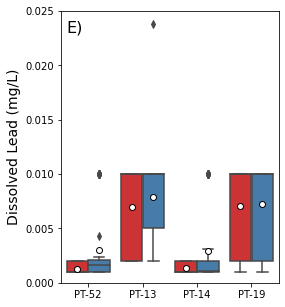

In [49]:
'''
'Artot', 'Pbdis', 'Pdtot',
       'Fedis', 'Fetot', 'Pdis', 'Ptot', 'Mndis', 'Mntot', 'pH', 'T', 'Turb',
       's_Al', 's_Ar', 's_Pb', 's_Fe', 's_P', 's_Mn', 's_arg', 's_sil',
       's_amf', 's_af', 's_am', 's_ag', 's_amg', 'Qmed'],
'''

#plt.figure(figsize=(3.9,5))
plt.figure(figsize=(3.9,5))
sns.boxplot(y='Pb(dis)',
            x='Sector',
            data=dados,
            hue='Period',
            showmeans=True,
            palette="Set1",
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"6"})

plt.xlabel('')
plt.ylabel('Dissolved Lead (mg/L)', fontsize=14)
plt.text(-0.4,0.023,"E)",
         horizontalalignment='left',
         size=16,
         color='black',
         weight='normal')
#plt.legend(loc='lower left',
#           ncol=1,
#           bbox_to_anchor=(0,0.05),
#           frameon=True)
plt.legend('',frameon=False)
plt.ylim([0,0.025])

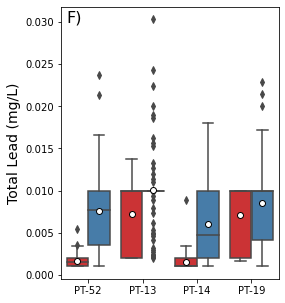

In [46]:
'''
       'Fedis', 'Fetot', 'Pdis', 'Ptot', 'Mndis', 'Mntot', 'pH', 'T', 'Turb',
       's_Al', 's_Ar', 's_Pb', 's_Fe', 's_P', 's_Mn', 's_arg', 's_sil',
       's_amf', 's_af', 's_am', 's_ag', 's_amg', 'Qmed'],
'''

#plt.figure(figsize=(3.9,5))
plt.figure(figsize=(3.9,5))
sns.boxplot(y='Pd(tot)',
            x='Sector',
            data=dados,
            hue='Period',
            showmeans=True,
            palette="Set1",
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"6"})

plt.xlabel('')
plt.ylabel('Total Lead (mg/L)', fontsize=14)
plt.text(-0.4,0.03,"F)",
         horizontalalignment='left',
         size=16,
         color='black',
         weight='normal')
#plt.legend(loc='lower left',
#           ncol=1,
#           bbox_to_anchor=(0,0.05),
#           frameon=True)
plt.legend('',frameon=False)
#plt.ylim([0,5])

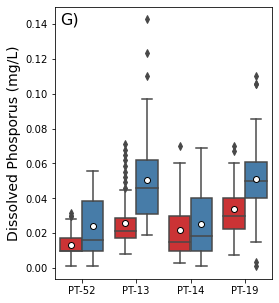

In [50]:
'''
       'Pdis', 'Ptot', 'Mndis', 'Mntot', 'pH', 'T', 'Turb',
       's_Al', 's_Ar', 's_Pb', 's_Fe', 's_P', 's_Mn', 's_arg', 's_sil',
       's_amf', 's_af', 's_am', 's_ag', 's_amg', 'Qmed'],
'''

#plt.figure(figsize=(3.9,5))
plt.figure(figsize=(3.9,5))
sns.boxplot(y='P(dis)',
            x='Sector',
            data=dados,
            hue='Period',
            showmeans=True,
            palette="Set1",
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"6"})

plt.xlabel('')
plt.ylabel('Dissolved Phosporus (mg/L)', fontsize=14)
plt.text(-0.4,0.14,"G)",
         horizontalalignment='left',
         size=16,
         color='black',
         weight='normal')
#plt.legend(loc='lower left',
#           ncol=1,
#           bbox_to_anchor=(0,0.05),
#           frameon=True)
plt.legend('',frameon=False)
#plt.ylim([0,5])

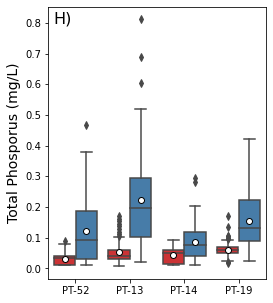

In [51]:
'''
       'Pdis', 'Ptot', 'Mndis', 'Mntot', 'pH', 'T', 'Turb',
       's_Al', 's_Ar', 's_Pb', 's_Fe', 's_P', 's_Mn', 's_arg', 's_sil',
       's_amf', 's_af', 's_am', 's_ag', 's_amg', 'Qmed'],
'''

#plt.figure(figsize=(3.9,5))
plt.figure(figsize=(3.9,5))
sns.boxplot(y='P(tot)',
            x='Sector',
            data=dados,
            hue='Period',
            showmeans=True,
            palette="Set1",
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"6"})

plt.xlabel('')
plt.ylabel('Total Phosporus (mg/L)', fontsize=14)
plt.text(-0.4,0.8,"H)",
         horizontalalignment='left',
         size=16,
         color='black',
         weight='normal')
#plt.legend(loc='lower left',
#           ncol=1,
#           bbox_to_anchor=(0,0.05),
#           frameon=True)
plt.legend('',frameon=False)
#plt.ylim([0,5])

(0.0, 4.0)

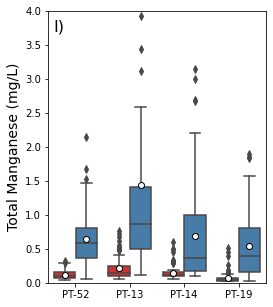

In [53]:
'''
       'Pdis', 'Ptot', 'Mndis', 'Mntot', 'pH', 'T', 'Turb',
       's_Al', 's_Ar', 's_Pb', 's_Fe', 's_P', 's_Mn', 's_arg', 's_sil',
       's_amf', 's_af', 's_am', 's_ag', 's_amg', 'Qmed'],
'''

#plt.figure(figsize=(3.9,5))
plt.figure(figsize=(3.9,5))
sns.boxplot(y='Mn(tot)',
            x='Sector',
            data=dados,
            hue='Period',
            showmeans=True,
            palette="Set1",
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"6"})

plt.xlabel('')
plt.ylabel('Total Manganese (mg/L)', fontsize=14)
plt.text(-0.4,3.7,"I)",
         horizontalalignment='left',
         size=16,
         color='black',
         weight='normal')
#plt.legend(loc='lower left',
#           ncol=1,
#           bbox_to_anchor=(0,0.05),
#           frameon=True)
plt.legend('',frameon=False)
plt.ylim([0,4])

# SOLOS !

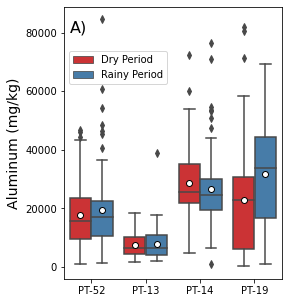

In [65]:
'''
       's_Al', 's_Ar', 's_Pb', 's_Fe', 's_P', 's_Mn', 's_arg', 's_sil',
       's_amf', 's_af', 's_am', 's_ag', 's_amg', 'Qmed'],
'''

#plt.figure(figsize=(3.9,5))
plt.figure(figsize=(3.9,5))
sns.boxplot(y='Al(sed)',
            x='Sector',
            data=dados,
            hue='Period',
            showmeans=True,
            palette="Set1",
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"6"})

plt.xlabel('')
plt.ylabel('Aluminum (mg/kg)', fontsize=14)
plt.text(-0.4,80000,"A)",
         horizontalalignment='left',
         size=16,
         color='black',
         weight='normal')
plt.legend(loc='lower left',
           ncol=1,
           bbox_to_anchor=(0,.7),
           frameon=True)
#plt.legend('',frameon=False)
#plt.ylim([0,4])

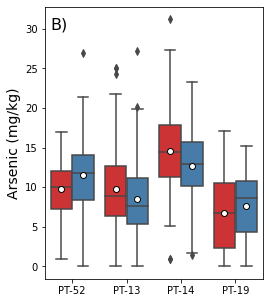

In [66]:
'''
       's_Al', 's_Ar', 's_Pb', 's_Fe', 's_P', 's_Mn', 's_arg', 's_sil',
       's_amf', 's_af', 's_am', 's_ag', 's_amg', 'Qmed'],
'''

#plt.figure(figsize=(3.9,5))
plt.figure(figsize=(3.9,5))
sns.boxplot(y='As(sed)',
            x='Sector',
            data=dados,
            hue='Period',
            showmeans=True,
            palette="Set1",
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"6"})

plt.xlabel('')
plt.ylabel('Arsenic (mg/kg)', fontsize=14)
plt.text(-0.4,30,"B)",
         horizontalalignment='left',
         size=16,
         color='black',
         weight='normal')
#plt.legend(loc='lower left',
#           ncol=1,
#           bbox_to_anchor=(0,0.05),
#           frameon=True)
plt.legend('',frameon=False)
#plt.ylim([0,4])

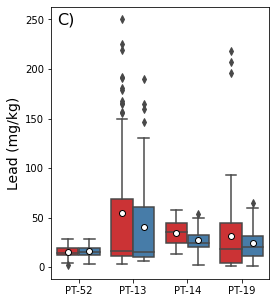

In [67]:
'''
       's_Al', 's_Ar', 's_Pb', 's_Fe', 's_P', 's_Mn', 's_arg', 's_sil',
       's_amf', 's_af', 's_am', 's_ag', 's_amg', 'Qmed'],
'''

#plt.figure(figsize=(3.9,5))
plt.figure(figsize=(3.9,5))
sns.boxplot(y='Pb(sed)',
            x='Sector',
            data=dados,
            hue='Period',
            showmeans=True,
            palette="Set1",
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"6"})

plt.xlabel('')
plt.ylabel('Lead (mg/kg)', fontsize=14)
plt.text(-0.4,245,"C)",
         horizontalalignment='left',
         size=16,
         color='black',
         weight='normal')
#plt.legend(loc='lower left',
#           ncol=1,
#           bbox_to_anchor=(0,0.05),
#           frameon=True)
plt.legend('',frameon=False)
#plt.ylim([0,4])

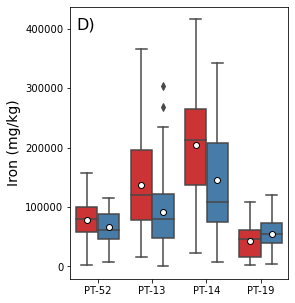

In [68]:
'''
       's_Al', 's_Ar', 's_Pb', 's_Fe', 's_P', 's_Mn', 's_arg', 's_sil',
       's_amf', 's_af', 's_am', 's_ag', 's_amg', 'Qmed'],
'''

#plt.figure(figsize=(3.9,5))
plt.figure(figsize=(3.9,5))
sns.boxplot(y='Fe(sed)',
            x='Sector',
            data=dados,
            hue='Period',
            showmeans=True,
            palette="Set1",
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"6"})

plt.xlabel('')
plt.ylabel('Iron (mg/kg)', fontsize=14)
plt.text(-0.4,400000,"D)",
         horizontalalignment='left',
         size=16,
         color='black',
         weight='normal')
#plt.legend(loc='lower left',
#           ncol=1,
#           bbox_to_anchor=(0,0.05),
#           frameon=True)
plt.legend('',frameon=False)
#plt.ylim([0,4])

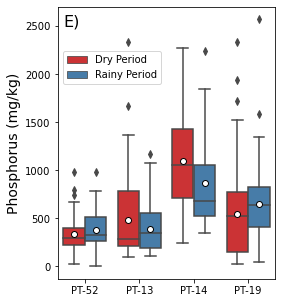

In [69]:
'''
       's_Al', 's_Ar', 's_Pb', 's_Fe', 's_P', 's_Mn', 's_arg', 's_sil',
       's_amf', 's_af', 's_am', 's_ag', 's_amg', 'Qmed'],
'''

#plt.figure(figsize=(3.9,5))
plt.figure(figsize=(3.9,5))
sns.boxplot(y='P(sed)',
            x='Sector',
            data=dados,
            hue='Period',
            showmeans=True,
            palette="Set1",
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"6"})

plt.xlabel('')
plt.ylabel('Phosphorus (mg/kg)', fontsize=14)
plt.text(-0.4,2500,"E)",
         horizontalalignment='left',
         size=16,
         color='black',
         weight='normal')
plt.legend(loc='lower left',
           ncol=1,
           bbox_to_anchor=(0,0.7),
           frameon=True)
#plt.legend('',frameon=False)
#plt.ylim([0,4])

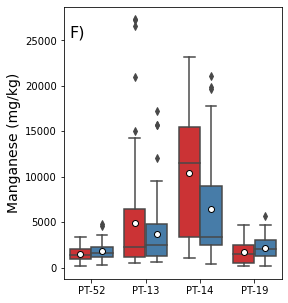

In [70]:
'''
       's_Al', 's_Ar', 's_Pb', 's_Fe', 's_P', 's_Mn', 's_arg', 's_sil',
       's_amf', 's_af', 's_am', 's_ag', 's_amg', 'Qmed'],
'''

#plt.figure(figsize=(3.9,5))
plt.figure(figsize=(3.9,5))
sns.boxplot(y='Mn(sed)',
            x='Sector',
            data=dados,
            hue='Period',
            showmeans=True,
            palette="Set1",
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"6"})

plt.xlabel('')
plt.ylabel('Manganese (mg/kg)', fontsize=14)
plt.text(-0.4,25300,"F)",
         horizontalalignment='left',
         size=16,
         color='black',
         weight='normal')
#plt.legend(loc='lower left',
#           ncol=1,
#           bbox_to_anchor=(0,0.7),
#           frameon=True)
plt.legend('',frameon=False)
#plt.ylim([0,4])

# Particulas solo

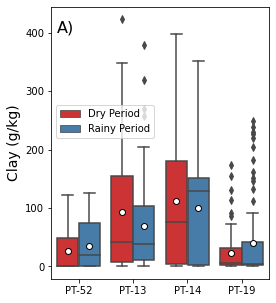

In [71]:
'''
       's_Al', 's_Ar', 's_Pb', 's_Fe', 's_P', 's_Mn', 's_arg', 's_sil',
       's_amf', 's_af', 's_am', 's_ag', 's_amg', 'Qmed'],
'''

#plt.figure(figsize=(3.9,5))
plt.figure(figsize=(3.9,5))
sns.boxplot(y='Clay',
            x='Sector',
            data=dados,
            hue='Period',
            showmeans=True,
            palette="Set1",
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"6"})

plt.xlabel('')
plt.ylabel('Clay (g/kg)', fontsize=14)
plt.text(-0.4,400,"A)",
         horizontalalignment='left',
         size=16,
         color='black',
         weight='normal')
plt.legend(loc='lower left',
           ncol=1,
           bbox_to_anchor=(0,0.5),
           frameon=True)
#plt.legend('',frameon=False)
#plt.ylim([0,4])

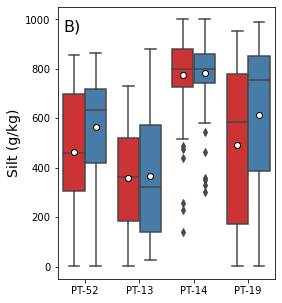

In [72]:
'''
       's_arg', 's_sil',
       's_amf', 's_af', 's_am', 's_ag', 's_amg', 'Qmed'],
'''

#plt.figure(figsize=(3.9,5))
plt.figure(figsize=(3.9,5))
sns.boxplot(y='Silt',
            x='Sector',
            data=dados,
            hue='Period',
            showmeans=True,
            palette="Set1",
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"6"})

plt.xlabel('')
plt.ylabel('Silt (g/kg)', fontsize=14)
plt.text(-0.4,950,"B)",
         horizontalalignment='left',
         size=16,
         color='black',
         weight='normal')
#plt.legend(loc='lower left',
#           ncol=1,
#           bbox_to_anchor=(0,0.5),
#           frameon=True)
plt.legend('',frameon=False)
#plt.ylim([0,4])

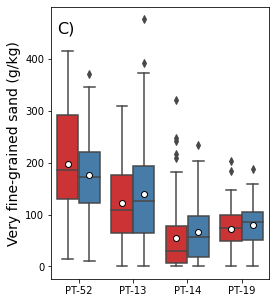

In [73]:
'''
       's_arg', 's_sil',
       's_amf', 's_af', 's_am', 's_ag', 's_amg', 'Qmed'],
'''

#plt.figure(figsize=(3.9,5))
plt.figure(figsize=(3.9,5))
sns.boxplot(y='sandVF',
            x='Sector',
            data=dados,
            hue='Period',
            showmeans=True,
            palette="Set1",
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"6"})

plt.xlabel('')
plt.ylabel('Very fine-grained sand (g/kg)', fontsize=14)
plt.text(-0.4,450,"C)",
         horizontalalignment='left',
         size=16,
         color='black',
         weight='normal')
#plt.legend(loc='lower left',
#           ncol=1,
#           bbox_to_anchor=(0,0.5),
#           frameon=True)
plt.legend('',frameon=False)
#plt.ylim([0,4])

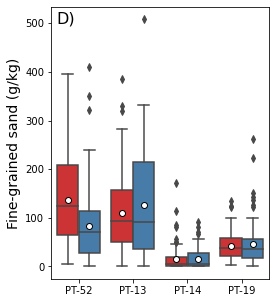

In [74]:
'''
       's_arg', 's_sil',
       's_amf', 's_af', 's_am', 's_ag', 's_amg', 'Qmed'],
'''

#plt.figure(figsize=(3.9,5))
plt.figure(figsize=(3.9,5))
sns.boxplot(y='sandF',
            x='Sector',
            data=dados,
            hue='Period',
            showmeans=True,
            palette="Set1",
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"6"})

plt.xlabel('')
plt.ylabel('Fine-grained sand (g/kg)', fontsize=14)
plt.text(-0.4,500,"D)",
         horizontalalignment='left',
         size=16,
         color='black',
         weight='normal')
#plt.legend(loc='lower left',
#           ncol=1,
#           bbox_to_anchor=(0,0.5),
#           frameon=True)
plt.legend('',frameon=False)
#plt.ylim([0,4])

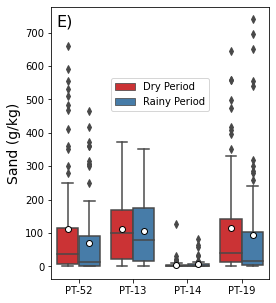

In [75]:
'''
       's_arg', 's_sil',
       's_amf', 's_af', 's_am', 's_ag', 's_amg', 'Qmed'],
'''

#plt.figure(figsize=(3.9,5))
plt.figure(figsize=(3.9,5))
sns.boxplot(y='sandM',
            x='Sector',
            data=dados,
            hue='Period',
            showmeans=True,
            palette="Set1",            
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"6"})

plt.xlabel('')
plt.ylabel('Sand (g/kg)', fontsize=14)
plt.text(-0.4,720,"E)",
         horizontalalignment='left',
         size=16,
         color='black',
         weight='normal')
plt.legend(loc='lower left',
           ncol=1,
           bbox_to_anchor=(0.25,0.6),
           frameon=True)
#plt.legend('',frameon=False)
#plt.ylim([0,4])

(0.0, 700.0)

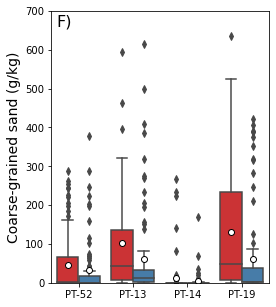

In [76]:
'''
       's_arg', 's_sil',
       's_amf', 's_af', 's_am', 's_ag', 's_amg', 'Qmed'],
'''

#plt.figure(figsize=(3.9,5))
plt.figure(figsize=(3.9,5))
sns.boxplot(y='sandC',
            x='Sector',
            data=dados,
            hue='Period',
            showmeans=True,
            palette="Set1",
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"6"})

plt.xlabel('')
plt.ylabel('Coarse-grained sand (g/kg)', fontsize=14)
plt.text(-0.4,660,"F)",
         horizontalalignment='left',
         size=16,
         color='black',
         weight='normal')
#plt.legend(loc='lower left',
#           ncol=1,
#           bbox_to_anchor=(0.25,0.6),
#           frameon=True)
plt.legend('',frameon=False)
plt.ylim([0,700])

(0.0, 700.0)

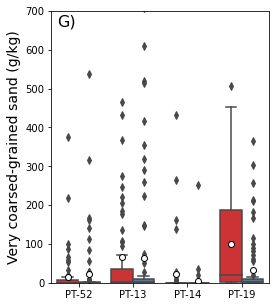

In [77]:
'''
       's_arg', 's_sil',
       's_amf', 's_af', 's_am', 's_ag', 's_amg', 'Qmed'],
'''

#plt.figure(figsize=(3.9,5))
plt.figure(figsize=(3.9,5))
sns.boxplot(y='sandVC',
            x='Sector',
            data=dados,
            hue='Period',
            showmeans=True,
            palette="Set1",
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"6"})

plt.xlabel('')
plt.ylabel('Very coarsed-grained sand (g/kg)', fontsize=14)
plt.text(-0.4,660,"G)",
         horizontalalignment='left',
         size=16,
         color='black',
         weight='normal')
#plt.legend(loc='lower left',
#           ncol=1,
#           bbox_to_anchor=(0.25,0.6),
#           frameon=True)
plt.legend('',frameon=False)
plt.ylim([0,700])

(0.0, 350.0)

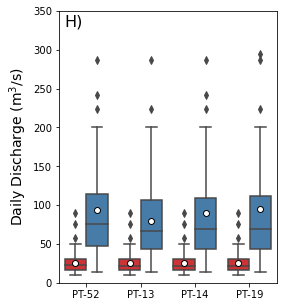

In [81]:
'''
       's_arg', 's_sil',
       's_amf', 's_af', 's_am', 's_ag', 's_amg', 'Qmed'],
'''

#plt.figure(figsize=(3.9,5))
plt.figure(figsize=(3.9,5))
sns.boxplot(y='Q',
            x='Sector',
            data=dados,
            hue='Period',
            showmeans=True,
            palette="Set1",
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"6"})

plt.xlabel('')
plt.ylabel(r'Daily Discharge (m$^3$/s)', fontsize=14)
plt.text(-0.4,330,"H)",
         horizontalalignment='left',
         size=16,
         color='black',
         weight='normal')
#plt.legend(loc='lower left',
#           ncol=1,
#           bbox_to_anchor=(0.25,0.6),
#           frameon=True)
plt.legend('',frameon=False)
plt.ylim([0,350])